# Dogs vs. Cats
- https://www.kaggle.com/c/dogs-vs-cats/data

Source code: https://github.com/deeplizard/Keras_Jupyter_Notebooks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Plot images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [10]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [3]:
image_path = 'dogs_and_cat/train/dog/4.jpg'
test = plt.imread(image_path)

In [4]:
type(test)

numpy.ndarray

In [5]:
test.shape

(288, 300, 3)

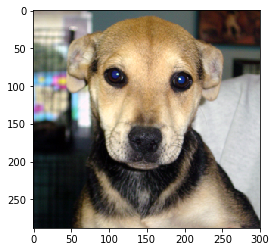

In [6]:
plt.imshow(test)

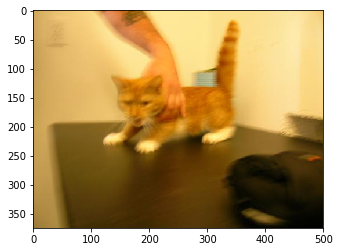

In [17]:
# Obtain image
image_path = 'dogs_and_cat/train/cat/0.jpg'
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [18]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [19]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

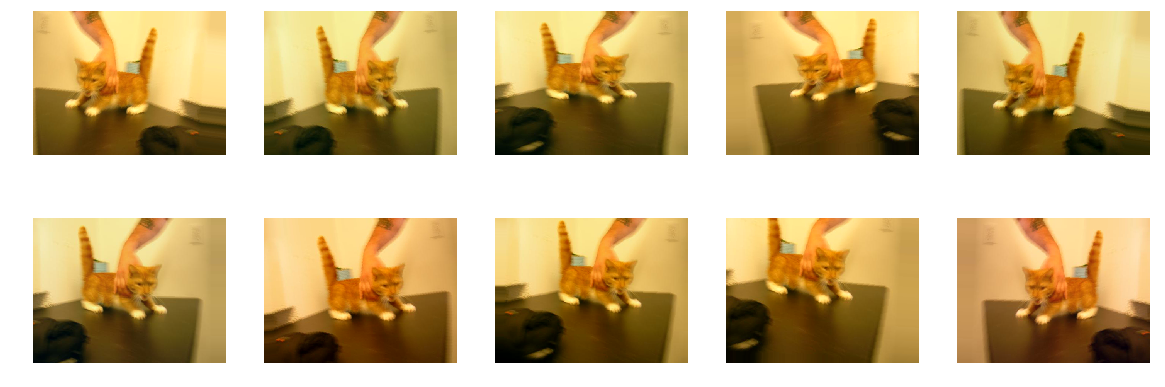

In [20]:
# Augmented images
plots(aug_images, figsize=(20,7), rows=2)